In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv',dayfirst='True')

In [9]:
df.head(205)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
200,201,18/03/20,Punjab,1,0,0,0
201,202,18/03/20,Rajasthan,2,2,3,0
202,203,18/03/20,Tamil Nadu,1,0,0,0
203,204,18/03/20,Telengana,4,2,1,0


In [10]:
df.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


In [11]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%Y.%m.%d')
#df['Date']

In [12]:
df['ConfirmedIndianNational'].sum()

1499

In [13]:
df['ConfirmedForeignNational'].sum()

359

In [14]:
df['Cured'].sum()

163

In [15]:
df['Deaths'].sum()

25

In [16]:
df['Daily']= df['ConfirmedIndianNational']+df['ConfirmedForeignNational']+df['Cured']+df['Deaths']
df['Total']= df['Daily'].cumsum()

In [17]:
df_new= df.groupby(['Date','ConfirmedIndianNational','ConfirmedForeignNational','Cured'])['Deaths'].sum().reset_index()
df_new

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,01/02/20,2,0,0,0
1,01/03/20,3,0,0,0
2,02/02/20,3,0,0,0
3,02/03/20,1,0,0,0
4,02/03/20,3,0,0,0
...,...,...,...,...,...
200,27/02/20,3,0,0,0
201,28/02/20,3,0,0,0
202,29/02/20,3,0,0,0
203,30/01/20,1,0,0,0


In [18]:
df = df.groupby('Date', as_index=False).agg({"ConfirmedIndianNational": "sum","ConfirmedForeignNational": "sum","Cured": "sum","Deaths": "sum","Daily": "sum","Total":"sum"})
df


,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Daily,Total
0,01/02/20,2,0,0,0,2,4
1,01/03/20,3,0,0,0,3,91
2,02/02/20,3,0,0,0,3,7
3,02/03/20,5,0,0,0,5,283
4,03/02/20,3,0,0,0,3,10
5,03/03/20,5,1,3,0,9,404
6,04/02/20,3,0,0,0,3,13
7,04/03/20,12,16,3,0,31,724
8,05/02/20,3,0,0,0,3,16
9,05/03/20,14,16,3,0,33,916


In [19]:
df['Date']

0     01/02/20
1     01/03/20
2     02/02/20
3     02/03/20
4     03/02/20
5     03/03/20
6     04/02/20
7     04/03/20
8     05/02/20
9     05/03/20
10    06/02/20
11    06/03/20
12    07/02/20
13    07/03/20
14    08/02/20
15    08/03/20
16    09/02/20
17    09/03/20
18    10/02/20
19    10/03/20
20    11/02/20
21    11/03/20
22    12/02/20
23    12/03/20
24    13/02/20
25    13/03/20
26    14/02/20
27    14/03/20
28    15/02/20
29    15/03/20
30    16/02/20
31    16/03/20
32    17/02/20
33    17/03/20
34    18/02/20
35    18/03/20
36    19/02/20
37    19/03/20
38    20/02/20
39    20/03/20
40    21/02/20
41    21/03/20
42    22/02/20
43    23/02/20
44    24/02/20
45    25/02/20
46    26/02/20
47    27/02/20
48    28/02/20
49    29/02/20
50    30/01/20
51    31/01/20
Name: Date, dtype: object

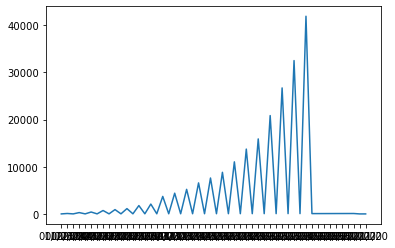

In [20]:
plt.plot(df['Date'],df['Total'])

In [21]:
start_date = "04/03/20"
end_date = "21/03/20"

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
filtered_dates

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Daily,Total
7,04/03/20,12,16,3,0,31,724
8,05/02/20,3,0,0,0,3,16
9,05/03/20,14,16,3,0,33,916
10,06/02/20,3,0,0,0,3,19
11,06/03/20,15,16,3,0,34,1126
12,07/02/20,3,0,0,0,3,22
13,07/03/20,18,16,3,0,37,1770
14,08/02/20,3,0,0,0,3,25
15,08/03/20,23,16,3,0,42,2087
16,09/02/20,3,0,0,0,3,28


In [22]:
potential_r= filtered_dates['Total'].pct_change()
potential_r

7            NaN
8      -0.977901
9      56.250000
10     -0.979258
11     58.263158
12     -0.980462
13     79.454545
14     -0.985876
15     82.480000
16     -0.986584
17    131.642857
18     -0.991653
19    140.774194
20     -0.992264
21    152.264706
22     -0.992900
23    176.810811
24     -0.993920
25    189.425000
26     -0.994355
27    204.209302
28     -0.994787
29    239.086957
30     -0.995563
31    279.571429
32     -0.996218
33    304.865385
34     -0.996542
35    378.254545
36     -0.997219
37    459.706897
38     -0.997717
39    532.131148
40     -0.998032
41    654.062500
Name: Total, dtype: float64

In [42]:
r=potential_r.mean()
r

120.65888773731807

In [46]:
p_o=31
t=26
e=2
r=121
p_t=p_o*(e^(r*t))
float(p_t)

97464.0